# Name: Thilini Herath

# Question-1

## Time of the year analysis

In [1]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt

/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/3580436765.py:15: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/3580436765.py:32: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  count_df.set_axis(["Jan", 'Feb', "Mar", "Apr", "May", "Jun","Jul", 'Aug', 'Sep', 'Oct', 'Nov', "Dec"], inplace=True)
/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/3580436765.py:32: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  count_df.set_axis(["Jan", 'Feb', "Mar", "Apr", "May", "Jun","Jul", 'Aug', 'Sep', 'Oct', 'Nov', "Dec"], inplace=True)
/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/3580

<Figure size 1500x600 with 0 Axes>

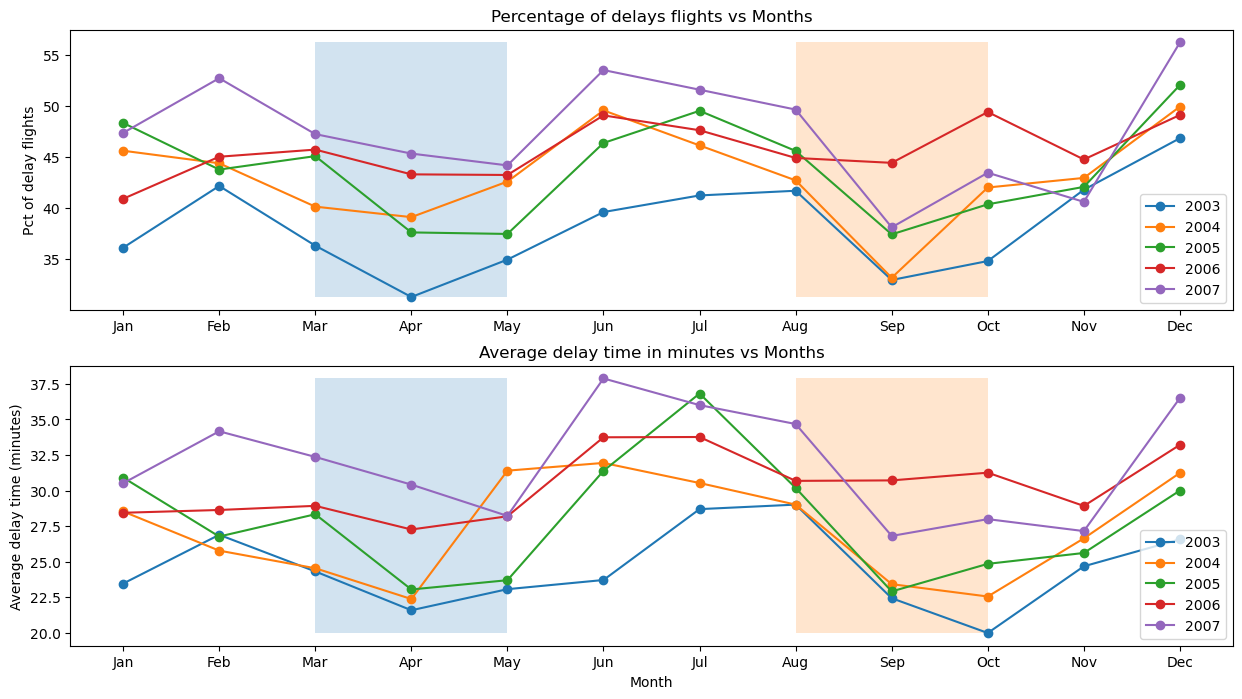

In [2]:

plt.figure(figsize=(15,6))

fig, (ax1, ax2) = plt.subplots(2, figsize=(15,8))


ave_min, ave_max = [], []
pct_min, pct_max = [], []

leg = []
for i in range(2003,2008):
    leg.append(str(i))
    
    filename = str(i)+'.csv'

    df = pd.read_csv(filename)
    df = df[[ 'Month', 'ArrDelay','Cancelled', 'Diverted']]

    df= df[(df.Cancelled==0) & (df.Diverted==0)]

    df = df[[ 'Month','ArrDelay']]

    count_df = pd.DataFrame()
    count_df['total_flights']=df.groupby(['Month'])['Month'].count()


    df1 = df[df['ArrDelay']>0]
    count_df['delays']=df1.groupby(['Month'])['Month'].count()
    count_df['Delay_mean']=df1.groupby(['Month'])['ArrDelay'].mean()


    count_df['pct_delays']= round(count_df['delays']/count_df['total_flights']*100,2)
    count_df.set_axis(["Jan", 'Feb', "Mar", "Apr", "May", "Jun","Jul", 'Aug', 'Sep', 'Oct', 'Nov', "Dec"], inplace=True)
    
    ave_min.append(min(count_df['Delay_mean']))
    ave_max.append(max(count_df['Delay_mean']))
    
    pct_min.append(min(count_df['pct_delays']))
    pct_max.append(max(count_df['pct_delays']))
    
    
    ax1.plot(count_df['pct_delays'], 'o-')
    ax2.plot(count_df['Delay_mean'], 'o-')

    
    
ax1.fill_between(['Mar', 'May'], min(pct_min), max(pct_max), alpha=0.2)
ax1.fill_between(['Aug', 'Oct'], min(pct_min), max(pct_max), alpha=0.2)

ax2.fill_between(['Mar', 'May'], min(ave_min), max(ave_max), alpha=0.2)
ax2.fill_between(['Aug', 'Oct'], min(ave_min), max(ave_max), alpha=0.2)

ax1.legend(leg, loc='lower right')
ax2.legend(leg, loc='lower right')

plt.xlabel("Month")

ax1.set_ylabel("Pct of delay flights")
ax2.set_ylabel("Average delay time (minutes)")

ax1.set_title("Percentage of delays flights vs Months")
ax2.set_title("Average delay time in minutes vs Months")

plt.show()


# day of week analysis

/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/1090439547.py:15: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/1090439547.py:33: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  count_df.set_axis(["Mon", 'Tue', "Wed", "Thu", "Fri", "Sat","Sun"], inplace=True)
/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/1090439547.py:33: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  count_df.set_axis(["Mon", 'Tue', "Wed", "Thu", "Fri", "Sat","Sun"], inplace=True)
/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/1090439547.py:33: FutureWarning: DataFrame.set_axis 'inplace' keyword is d

<Figure size 1500x600 with 0 Axes>

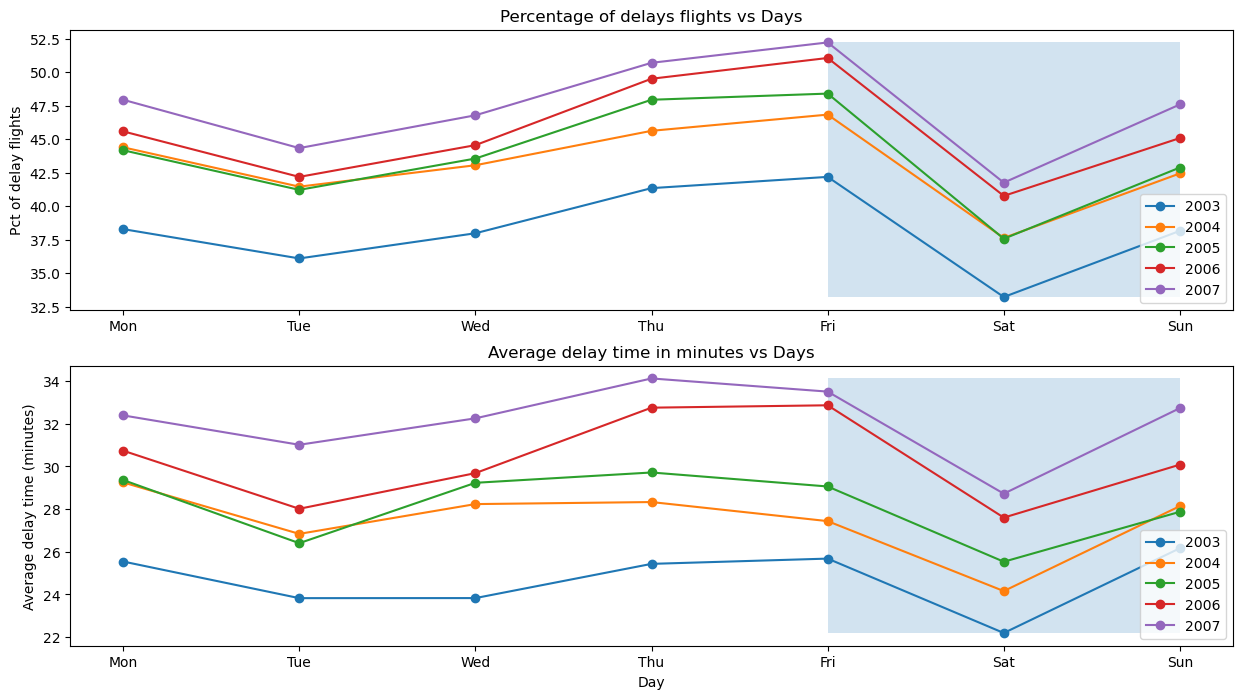

In [3]:
plt.figure(figsize=(15,6))

fig, (ax1, ax2) = plt.subplots(2, figsize=(15,8))


ave_min, ave_max = [], []
pct_min, pct_max = [], []

leg = []
for i in range(2003,2008):
    leg.append(str(i))
    
    filename = str(i)+'.csv'

    df = pd.read_csv(filename)
    df = df[[ 'DayOfWeek', 'ArrDelay','Cancelled', 'Diverted']]

    df= df[(df.Cancelled==0) & (df.Diverted==0)]

    df = df[[ 'DayOfWeek','ArrDelay']]

    count_df = pd.DataFrame()
    count_df['total_flights']=df.groupby(['DayOfWeek'])['DayOfWeek'].count()


    df1 = df[df['ArrDelay']>0]
    count_df['delays']=df1.groupby(['DayOfWeek'])['DayOfWeek'].count()
    count_df['Delay_mean']=df1.groupby(['DayOfWeek'])['ArrDelay'].mean()

    count_df = count_df.sort_values(['DayOfWeek'])

    count_df['pct_delays']= round(count_df['delays']/count_df['total_flights']*100,2)
    count_df.set_axis(["Mon", 'Tue', "Wed", "Thu", "Fri", "Sat","Sun"], inplace=True)
    
    ave_min.append(min(count_df['Delay_mean']))
    ave_max.append(max(count_df['Delay_mean']))
    
    pct_min.append(min(count_df['pct_delays']))
    pct_max.append(max(count_df['pct_delays']))
    
    
    ax1.plot(count_df['pct_delays'], 'o-')
    ax2.plot(count_df['Delay_mean'], 'o-')

    
    
ax1.fill_between(['Fri', 'Sun'], min(pct_min), max(pct_max), alpha=0.2)


ax2.fill_between(['Fri', 'Sun'], min(ave_min), max(ave_max), alpha=0.2)


ax1.legend(leg, loc='lower right')
ax2.legend(leg, loc='lower right')

plt.xlabel("Day")

ax1.set_ylabel("Pct of delay flights")
ax2.set_ylabel("Average delay time (minutes)")

ax1.set_title("Percentage of delays flights vs Days")
ax2.set_title("Average delay time in minutes vs Days")

plt.show()





# time of day analysis

/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/1122495397.py:18: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/1122495397.py:52: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  count_df.set_axis(day_time_list, inplace=True)
/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/1122495397.py:52: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  count_df.set_axis(day_time_list, inplace=True)
/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_51030/1122495397.py:52: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_

<Figure size 1500x600 with 0 Axes>

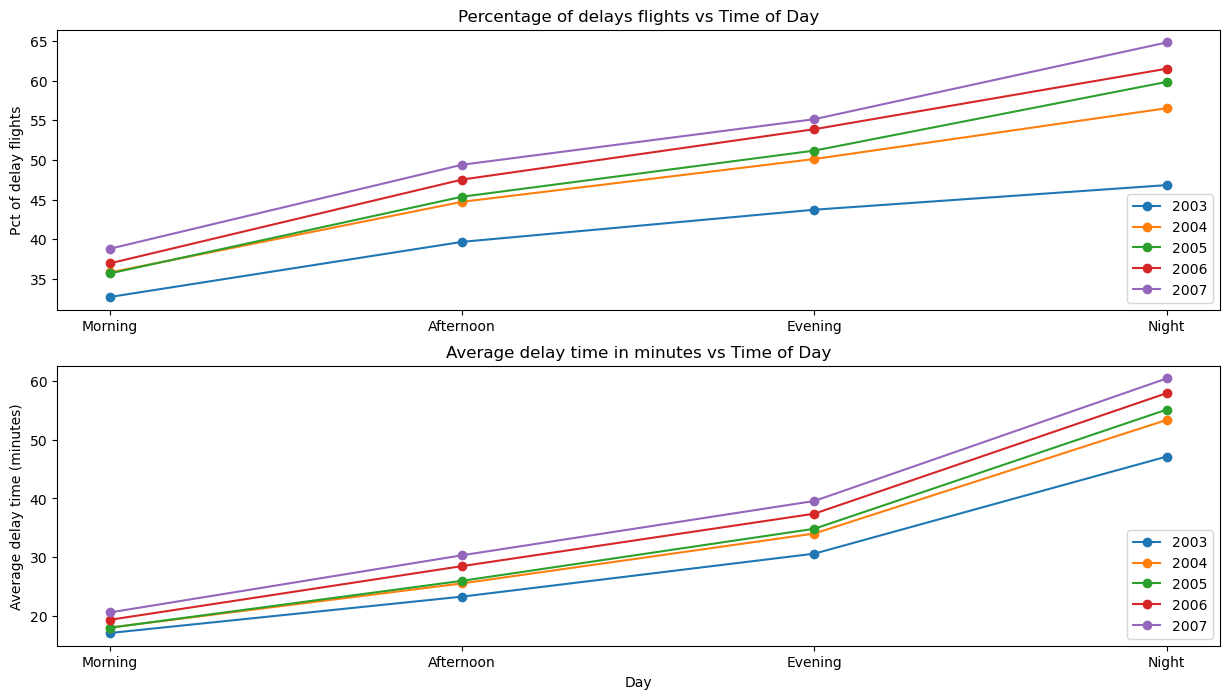

In [4]:
from pandas.api.types import CategoricalDtype


plt.figure(figsize=(15,6))

fig, (ax1, ax2) = plt.subplots(2, figsize=(15,8))


ave_min, ave_max = [], []
pct_min, pct_max = [], []

leg = []
for i in range(2003,2008):
    leg.append(str(i))
    
    filename = str(i)+'.csv'

    df = pd.read_csv(filename)
    df = df[[ 'DepTime','CRSDepTime', 'ArrDelay','Cancelled', 'Diverted']]

    df= df[(df.Cancelled==0) & (df.Diverted==0)]
    
    #there is no special reason to change CRSDepTime column, just needed a column to add times of the day
    
    df.loc[(df['DepTime']>=500) & (df['DepTime']<1200),'CRSDepTime']="Morning"
    df.loc[(df['DepTime']>=1200) & (df['DepTime']<1700),'CRSDepTime']="Afternoon"
    df.loc[(df['DepTime']>=1700) & (df['DepTime']<2100),'CRSDepTime']="Evening"
    df.loc[(df['DepTime']>=2100)|(df['DepTime']<500),'CRSDepTime']="Night"
    df.rename({'CRSDepTime': "Time_of_day"}, axis=1, inplace=True)

    df = df[[ 'Time_of_day','ArrDelay']]
    

    count_df = pd.DataFrame()
    count_df['total_flights']=df.groupby(['Time_of_day'])['Time_of_day'].count()
    

    df1 = df[df['ArrDelay']>0]
    count_df['delays']=df1.groupby(['Time_of_day'])['Time_of_day'].count()
    count_df['Delay_mean']=df1.groupby(['Time_of_day'])['ArrDelay'].mean()
    
    day_time_list = ['Morning', 'Afternoon', 'Evening', 'Night']
    
    day_time_order = CategoricalDtype(day_time_list, ordered=True)
    
    count_df.reset_index(inplace=True)
    count_df['Time_of_day'] = count_df['Time_of_day'].astype(day_time_order)
    
    count_df = count_df.sort_values(['Time_of_day'])

    count_df['pct_delays']= round(count_df['delays']/count_df['total_flights']*100,2)
    count_df.set_axis(day_time_list, inplace=True)
    
    ave_min.append(min(count_df['Delay_mean']))
    ave_max.append(max(count_df['Delay_mean']))
    
    pct_min.append(min(count_df['pct_delays']))
    pct_max.append(max(count_df['pct_delays']))
    
    
    ax1.plot(count_df['pct_delays'], 'o-')
    ax2.plot(count_df['Delay_mean'], 'o-')

    
    
#ax1.fill_between(['Fri', 'Sun'], min(pct_min), max(pct_max), alpha=0.2)


#ax2.fill_between(['Fri', 'Sun'], min(ave_min), max(ave_max), alpha=0.2)


ax1.legend(leg, loc='lower right')
ax2.legend(leg, loc='lower right')

plt.xlabel("Day")

ax1.set_ylabel("Pct of delay flights")
ax2.set_ylabel("Average delay time (minutes)")

ax1.set_title("Percentage of delays flights vs Time of Day")
ax2.set_title("Average delay time in minutes vs Time of Day")

plt.show()



In [41]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
#try:
    #os.remove('airline_project.db')
#except OSError:
    #pass

In [43]:
# Note your path to the database may be different 
conn = sqlite3.connect('airline_project.db')

In [ ]:
c = conn.cursor()

c.execute('''
CREATE TABLE ontime (
  Year int,
  Month int,
  DayofMonth int,
  DayOfWeek int,
  DepTime  int,
  CRSDepTime int,
  ArrTime int,
  CRSArrTime int,
  UniqueCarrier varchar(5),
  FlightNum int,
  TailNum varchar(8),
  ActualElapsedTime int,
  CRSElapsedTime int,
  AirTime int,
  ArrDelay int,
  DepDelay int,
  Origin varchar(3),
  Dest varchar(3),
  Distance int,
  TaxiIn int,
  TaxiOut int,
  Cancelled int,
  CancellationCode varchar(1),
  Diverted varchar(1),
  CarrierDelay int,
  WeatherDelay int,
  NASDelay int,
  SecurityDelay int,
  LateAircraftDelay int
)
''')
conn.commit()

for year in range(2003, 2008):
    ontime = pd.read_csv(str(year)+".csv")
    ontime.to_sql('ontime', con = conn, if_exists = 'append', index = False)

conn.commit()

In [71]:
planes = pd.read_csv("plane-data.csv")

In [72]:
planes.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
planes.to_sql('planes', con = conn, index = False)

In [69]:
carriers = pd.read_csv("carriers.csv")

In [70]:
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [ ]:
carriers.to_sql('carriers', con = conn, index = False)

In [67]:
airports = pd.read_csv("airports.csv")

In [68]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [140]:
airports.to_sql('airports', con = conn, index = False)

3376

In [44]:
c = conn.cursor()

output=c.execute(''' SELECT ontime.Year, Month, DayofMonth, planes.issue_date, ArrDelay FROM ontime 
INNER JOIN planes ON ontime.TailNum=planes.TailNum
WHERE ontime.Cancelled=0 AND ontime.Diverted=0 AND issue_date IS NOT NULL AND issue_date IS NOT 'None'
AND ontime.Year = 2006 OR ontime.Year = 2007 
''').fetchall()

df=pd.DataFrame(output,columns=['Year','Month','DayofMonth','issue_date','ArrDelay'])

In [120]:
df.isnull().sum()

Year               0
Month              0
DayofMonth         0
issue_date    352689
ArrDelay       57697
dtype: int64

In [45]:
df[df.issue_date=='None'].shape

(307, 5)

In [46]:
df.dropna(inplace=True)
df = df[df.issue_date!='None']

In [47]:
df.shape

(11927814, 5)

In [48]:
df.rename({'DayofMonth':'Day'}, inplace=True, axis=1)
df['fly_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%m/%d/%Y')
df['age'] = (df.fly_date - df.issue_date).dt.days/365.25

In [49]:
df=df[df.age>=0]

In [126]:
df.shape

(11210650, 7)

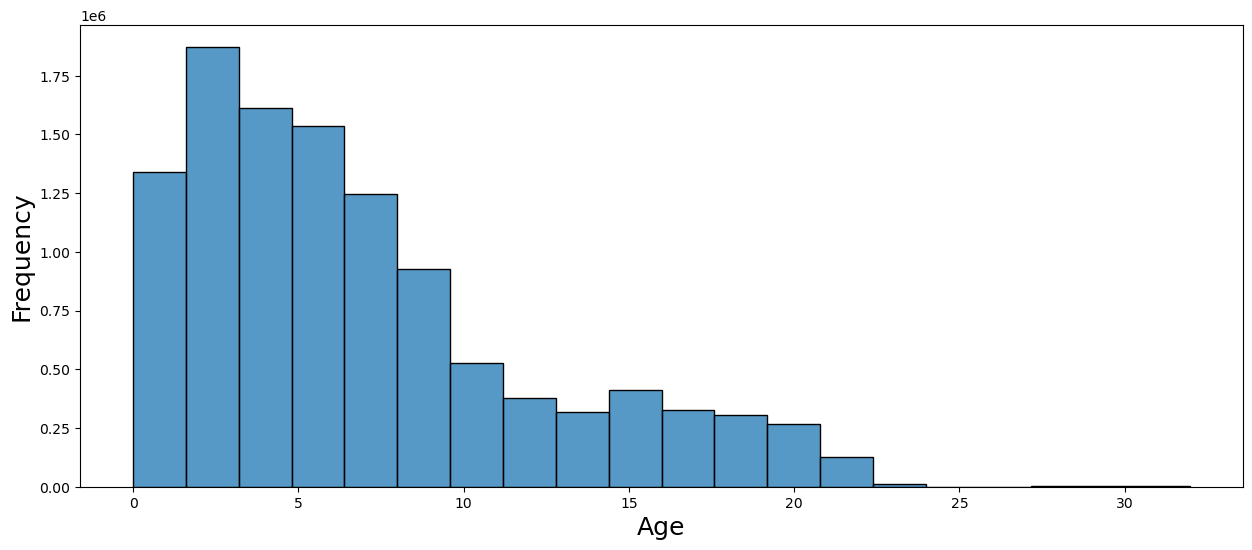

In [51]:
plt.figure(figsize=(15,6))
sns.histplot(df.age, bins=20)
plt.xlabel('Age',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.show()

In [128]:
df.age.describe()

count    1.121065e+07
mean     6.935848e+00
std      5.341058e+00
min      0.000000e+00
25%      2.861054e+00
50%      5.579740e+00
75%      9.308693e+00
max      3.197536e+01
Name: age, dtype: float64

### 75 percentile is 9.1 years. So take Age<9 is new and Age>=9 is old

In [137]:
new_old_cut_off = 25

new_delays_pct = (df[(df.age<new_old_cut_off) & (df.ArrDelay>0)].shape[0])/(df[(df.age<new_old_cut_off)].shape[0])*100
old_delays_pct = (df[(df.age>=new_old_cut_off) & (df.ArrDelay>0)].shape[0])/(df[(df.age>=new_old_cut_off)].shape[0])*100

In [138]:
print('Percentage of delayed journeys made by new planes = ', new_delays_pct)
print('Percentage of delayed journeys made by old planes = ', old_delays_pct)

Percentage of delayed journeys made by new planes =  47.02547399855019
Percentage of delayed journeys made by old planes =  45.801382183091924


# Question 3

In [8]:
#collect only unique pairs, 
def unicom2(df):
    uni_com = df.comb.unique().tolist()
    uni_com2 = df.comb.unique().tolist()
    uni_com3 = df.comb.unique().tolist()

    for c1 in uni_com:
        x = c1.split("_")
        for c2 in uni_com2:
            y = c2.split("_")
            if (x[0]==y[1]) and (x[1]==y[0]):
                uni_com3.remove(c2)
                #print(c1)
                #print(c2)
    return uni_com3


In [17]:
#collect only unique pairs which are in the data
def existing_unicom (countdf, uni_com2):
    comlist1 = countdf.comb.tolist()
    comlist2 = countdf.comb.tolist()
    for c1 in uni_com2:
        x = c1.split('_')
        i=0
        for c2 in comlist1:
            y = c2.split('_')
            if ((y[0]==x[0]) & (y[0]==x[0])) or ((y[1]==x[0]) & (y[1]==x[0])):
                comlist2[i]=c1
                #print(c1)
                #print(c2)
            i+=1
    return comlist2  
    

In [22]:
years = [x for x in range(2003,2008)]
for k in years:
    print(k)
    dfname = str(k)+'temp.csv'
    filename = str(k)+'.csv'

    df = pd.read_csv(filename)
    df = df[(df.Cancelled==0)&(df.Diverted==0)]
    df = df[['Origin', 'Dest']]

    df['comb'] = df['Origin']+'_'+df['Dest']
    
    if k==years[0]:
        uni_com = df.comb.unique()
        uni_com2 = unicom2(df)

    countdf = df.groupby(['comb']).count().reset_index()

    countdf = countdf.drop(["Dest"], axis=1)


    comlist = existing_unicom(countdf, uni_com2)

    countdf['unicom'] = comlist


    final_df = countdf.groupby(['unicom']).sum().sort_values(['Origin'], ascending=False)
    final_df = final_df.reset_index()

    final_df['year_'+str(k)] = k
    
    print(final_df.shape)
    
    final_df.rename({'Origin':'num_journeys_'+str(k)}, axis=1, inplace=True)
    
    
    if k==years[0]:
        merged = final_df
        concat_list = final_df['unicom'].tolist()
    else:
        merged = pd.merge(merged,final_df,how='inner',on='unicom')
        
        concat_list.extend(final_df['unicom'].tolist())
    
    
    
    
    
    #final_df.to_csv(dfname, index=False)




2003


/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_13349/2808999727.py:7: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_13349/2808999727.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = countdf.groupby(['unicom']).sum().sort_values(['Origin'], ascending=False)


(1209, 3)
2004


/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_13349/2808999727.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = countdf.groupby(['unicom']).sum().sort_values(['Origin'], ascending=False)


(1269, 3)
2005


/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_13349/2808999727.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = countdf.groupby(['unicom']).sum().sort_values(['Origin'], ascending=False)


(1286, 3)
2006


/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_13349/2808999727.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = countdf.groupby(['unicom']).sum().sort_values(['Origin'], ascending=False)


(1372, 3)
2007
(1451, 3)


/var/folders/df/t690wl_95dg61prvkr2c5pbc0000gp/T/ipykernel_13349/2808999727.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = countdf.groupby(['unicom']).sum().sort_values(['Origin'], ascending=False)


In [23]:
merged.head()

,unicom,num_journeys_2003,year_2003,num_journeys_2004,year_2004,num_journeys_2005,year_2005,num_journeys_2006,year_2006,num_journeys_2007,year_2007
0,DFW_MYR,546685,2003,567489,2004,522978,2005,500672,2006,482672,2007
1,ORD_STT,399588,2003,406762,2004,364729,2005,400433,2006,395907,2007
2,DTW_LIT,269735,2003,282996,2004,262063,2005,247828,2006,340182,2007
3,LAS_COS,227220,2003,244079,2004,261899,2005,290848,2006,289218,2007
4,PHL_MCN,165608,2003,184347,2004,184798,2005,161354,2006,152284,2007


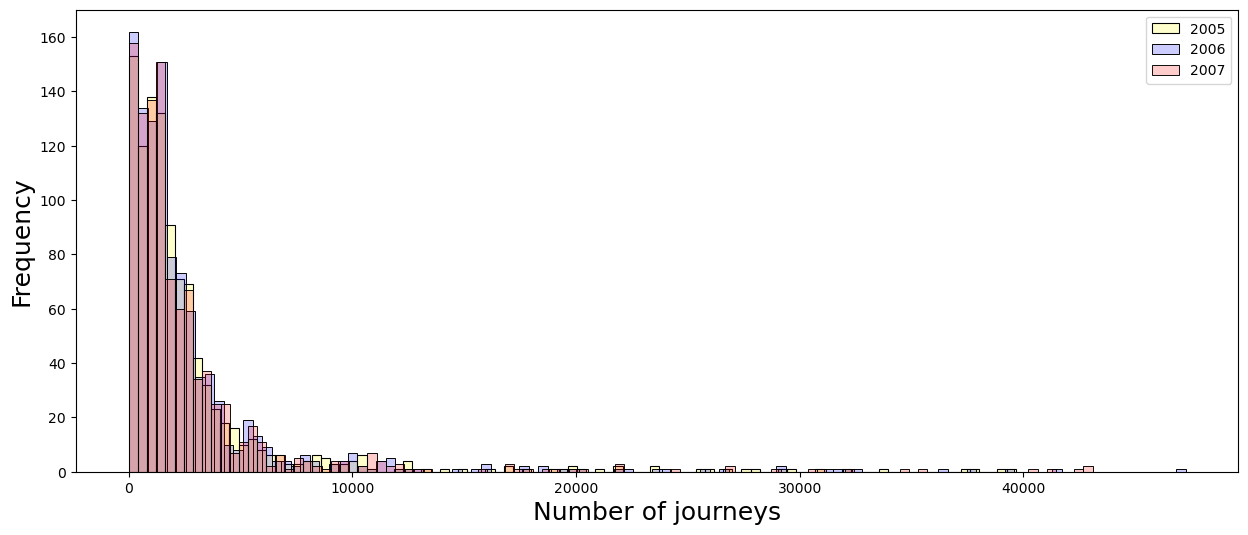

In [37]:
plt.figure(figsize=(15,6))
sns.histplot(merged[merged.num_journeys_2005<50000].num_journeys_2005, color = 'yellow', alpha=0.2)
sns.histplot(merged[merged.num_journeys_2006<50000].num_journeys_2006, color = 'blue',alpha=0.2)
sns.histplot(merged[merged.num_journeys_2007<50000].num_journeys_2007, color = 'red',alpha=0.2)
plt.legend(['2005','2006','2007'])
plt.xlabel('Number of journeys',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.show()

In [29]:
subset = merged.sort_values(['num_journeys_2003'], ascending=False)

subset = subset.iloc[0:20]

In [30]:
subset.head()

,unicom,num_journeys_2003,year_2003,num_journeys_2004,year_2004,num_journeys_2005,year_2005,num_journeys_2006,year_2006,num_journeys_2007,year_2007
0,DFW_MYR,546685,2003,567489,2004,522978,2005,500672,2006,482672,2007
1,ORD_STT,399588,2003,406762,2004,364729,2005,400433,2006,395907,2007
2,DTW_LIT,269735,2003,282996,2004,262063,2005,247828,2006,340182,2007
3,LAS_COS,227220,2003,244079,2004,261899,2005,290848,2006,289218,2007
4,PHL_MCN,165608,2003,184347,2004,184798,2005,161354,2006,152284,2007


[]

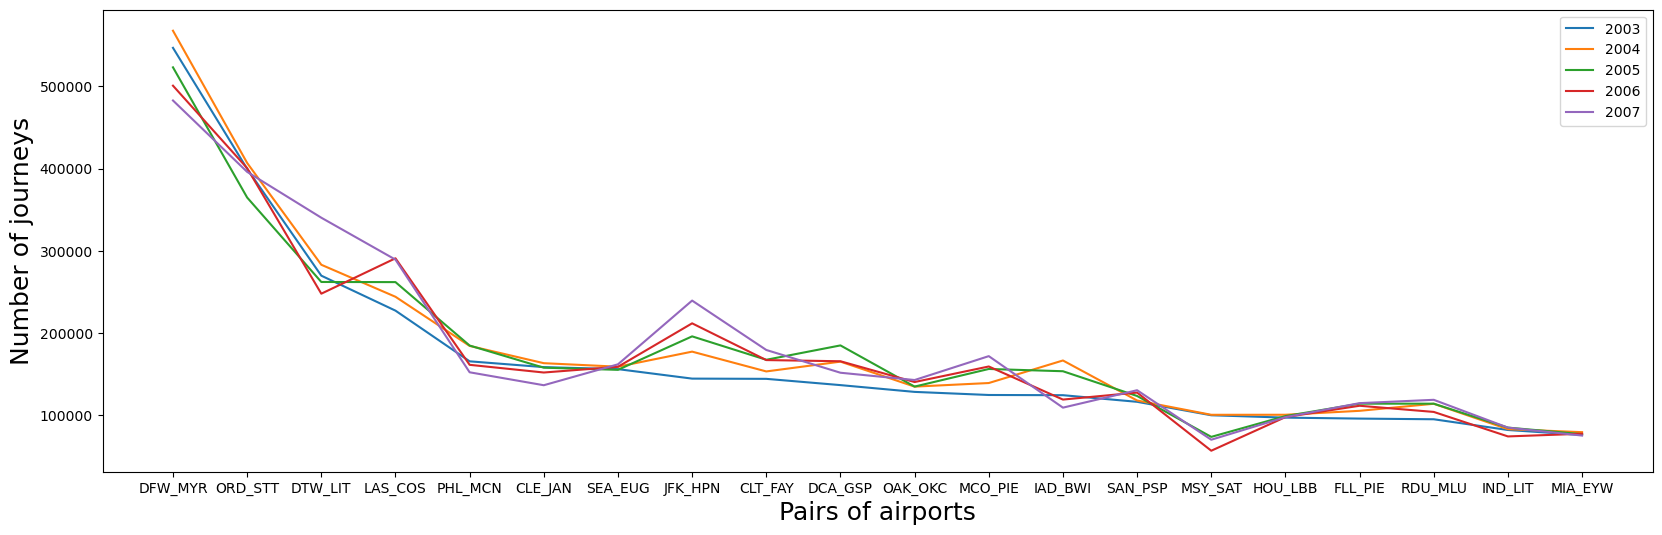

In [38]:
plt.figure(figsize=(20,6))
sns.lineplot(data = subset, x='unicom', y='num_journeys_2003', label="2003")
sns.lineplot(data = subset, x='unicom', y='num_journeys_2004', label="2004")
sns.lineplot(data = subset, x='unicom', y='num_journeys_2005', label="2005")
sns.lineplot(data = subset, x='unicom', y='num_journeys_2006', label="2006")
sns.lineplot(data = subset, x='unicom', y='num_journeys_2007', label="2007")
plt.xlabel('Pairs of airports',fontsize=18)
plt.ylabel('Number of journeys',fontsize=18)
plt.plot()

In [250]:
len(uni_com2)

3059

In [ ]:
countdf = countdf.drop(["Dest"], axis=1)

In [251]:
countdf = df.groupby(['comb']).count().reset_index()

In [252]:
countdf.shape

(5032, 3)

In [214]:
len(uni_com2)

2829

# Question 4

### Below is the step by step analysis of this problem. At the end you will find the complete solution which generate the cascading sequence of delays

In [52]:
c = conn.cursor()

output=c.execute(''' SELECT ontime.Year, Month, DayofMonth, CRSArrTime, CRSDepTime, 
    ontime.TailNum, ArrDelay, DepDelay, Origin, Dest, 
    CarrierDelay, WeatherDelay, NASDelay,SecurityDelay, LateAircraftDelay
FROM ontime
INNER JOIN planes ON ontime.TailNum=planes.TailNum
WHERE ontime.Cancelled=0 AND ontime.Diverted=0
AND ontime.Year = 2006
''').fetchall()


In [57]:
df=pd.DataFrame(output,columns=['Year', 'Month', 'DayofMonth', 'CRSArrTime', 'CRSDepTime', 'TailNum', 'ArrDelay', 
                                'DepDelay', 'Origin', 'Dest', 'CarrierDelay', 'WeatherDelay', 
                                'NASDelay','SecurityDelay', 'LateAircraftDelay'])

In [106]:
df.shape

(5812336, 15)

In [58]:
df.rename({'DayofMonth':'Day'}, inplace=True, axis=1)
df['fly_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

df = df[(df.CarrierDelay>0)|(df.WeatherDelay>0)|(df.NASDelay>0)|(df.SecurityDelay>0)|(df.LateAircraftDelay>0)].reset_index(drop=True)

In [108]:
df.head()

,CRSArrTime,CRSDepTime,TailNum,ArrDelay,DepDelay,Origin,Dest,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,fly_date
0,1654,1540,N105UW,149,132,BDL,PHL,0,0,149,0,0,2006-01-11
1,1259,1145,N702UW,25,8,BDL,PHL,0,0,25,0,0,2006-01-11
2,1020,810,N514AU,15,-4,BNA,CLT,0,0,15,0,0,2006-01-11
3,2027,1845,N713UW,37,20,BOS,DCA,14,0,17,0,6,2006-01-11
4,911,800,N715UW,18,-4,BOS,LGA,0,0,18,0,0,2006-01-11


In [59]:
tailnum = df.TailNum.unique()
len(tailnum)

4239

In [83]:
#taking only one plane and sortby the sechduled arrival time. Also check if the first delay is not due to 
#LateAircraftDelay because we need the first delay due to some other factors and the fllowing delays are due to LateAircraftDelay
#which proves (detects) cascading delays.
df1 = df[(df.TailNum==tailnum[2])]

df1 = df1.sort_values(['fly_date','CRSArrTime','ArrDelay'], ascending = [True, True, False]).reset_index(drop=True)

#date with the highest number of journeys sorted by CRSArrTime
day = df1.groupby(['fly_date']).count().sort_values(['CRSArrTime'], ascending=False).index[0]


df2 = df1[(df1.fly_date==day)]

df2.reset_index(drop=True, inplace=True)


In [84]:
df2

,CRSArrTime,CRSDepTime,TailNum,ArrDelay,DepDelay,Origin,Dest,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,fly_date
0,835,620,N514AU,21,-8,BNA,CLT,0,0,21,0,0,2006-08-06
1,1111,920,N514AU,38,29,CLT,EWR,13,0,9,0,16,2006-08-06
2,1329,1145,N514AU,35,45,EWR,CLT,9,0,0,0,26,2006-08-06
3,1558,1420,N514AU,15,37,CLT,DFW,5,0,0,0,10,2006-08-06
4,2010,1640,N514AU,79,14,DFW,CLT,11,0,65,0,3,2006-08-06
5,2226,2130,N514AU,25,33,CLT,ILM,0,0,0,0,25,2006-08-06


In [85]:
airports = pd.read_csv("airports.csv")

In [86]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [87]:
#preparing airports data to get longitudes and latitutes or origin and destination

airports['Origin'] = airports['iata']

airports = airports[['Origin', 'lat', 'long']]

airports2 = airports.copy()

airports.rename({'lat':'ori_lat','long':'ori_long' }, axis=1, inplace=True)

airports2.rename({'Origin':'Dest', 'lat':'des_lat','long':'des_long' }, axis=1, inplace=True)

In [88]:
airports.head()

,Origin,ori_lat,ori_long
0,00M,31.953765,-89.234505
1,00R,30.685861,-95.017928
2,00V,38.945749,-104.569893
3,01G,42.741347,-78.052081
4,01J,30.688012,-81.905944


In [89]:
airports2.head()

,Dest,des_lat,des_long
0,00M,31.953765,-89.234505
1,00R,30.685861,-95.017928
2,00V,38.945749,-104.569893
3,01G,42.741347,-78.052081
4,01J,30.688012,-81.905944


In [90]:
#merge Long Lat dataframe without changing the row order

result = df2.merge(df2.merge(airports, how='inner', on='Origin', sort=False))

result = result.merge(result.merge(airports2, how='inner', on='Dest', sort=False))


In [91]:
result.head()

,CRSArrTime,CRSDepTime,TailNum,ArrDelay,DepDelay,Origin,Dest,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,fly_date,ori_lat,ori_long,des_lat,des_long
0,835,620,N514AU,21,-8,BNA,CLT,0,0,21,0,0,2006-08-06,36.124477,-86.678182,35.214011,-80.943126
1,1111,920,N514AU,38,29,CLT,EWR,13,0,9,0,16,2006-08-06,35.214011,-80.943126,40.692497,-74.168661
2,1329,1145,N514AU,35,45,EWR,CLT,9,0,0,0,26,2006-08-06,40.692497,-74.168661,35.214011,-80.943126
3,1558,1420,N514AU,15,37,CLT,DFW,5,0,0,0,10,2006-08-06,35.214011,-80.943126,32.895951,-97.037200
4,2010,1640,N514AU,79,14,DFW,CLT,11,0,65,0,3,2006-08-06,32.895951,-97.037200,35.214011,-80.943126


### Final analysis of the solution

In [95]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot


def make_arrow(i, df):
    A = np.array([df['ori_long'][i], df['ori_lat'][i]])
    B = np.array([df['des_long'][i], df['des_lat'][i]])
    v = B-A
    w = v/np.linalg.norm(v)     
    u  =np.array([-v[1], v[0]])  #u orthogonal on  w
         
    P = B-l*w
    S = P - widh*u
    T = P + widh*u
    
    return S,T,B, A



scale = 1000

fig = go.Figure()

for num in [2]:

    df1 = df[(df.TailNum==tailnum[num])]
    
    df1 = df1.sort_values(['fly_date','CRSArrTime','ArrDelay'], ascending = [True, True, False]).reset_index(drop=True)
    
    #date with the highest number of journeys
    day = df1.groupby(['fly_date']).count().sort_values(['CRSArrTime'], ascending=False).index[0]
    
    
    df2 = df1[(df1.fly_date==day)]
    
    df2.reset_index(drop=True, inplace=True)
    
    airports = pd.read_csv("airports.csv")
    
    
    #preparing airports data to get longitudes and latitutes or origin and destination
    
    airports['Origin'] = airports['iata']
    
    airports = airports[['Origin', 'lat', 'long']]
    
    airports2 = airports.copy()
    
    airports.rename({'lat':'ori_lat','long':'ori_long' }, axis=1, inplace=True)
    
    airports2.rename({'Origin':'Dest', 'lat':'des_lat','long':'des_long' }, axis=1, inplace=True)
    
    
    #merge Long Lat dataframe without changing the row order
    
    result = df2.merge(df2.merge(airports, how='inner', on='Origin', sort=False))
    
    result = result.merge(result.merge(airports2, how='inner', on='Dest', sort=False))


#############################################################################################





    fig.add_trace(go.Scattergeo(
            locationmode = 'USA-states',
            lon = result['des_long'],
            lat = result['des_lat'],
            text = result['Dest'],
            textfont = {"color": 'black',
                        "family":'Times New Roman',
                        "size":14},
            textposition="top left",
            name = "Destinations",
            mode ="markers+text+lines",
            marker = dict(
                size = 10,
                color = "black",
                line_color='black',
                line_width=0.5,
                opacity=0.5,
                sizemode = 'area')))
    
    fig.add_trace(go.Scattergeo(
            locationmode = 'USA-states',
            lon = result['ori_long'],
            lat = result['ori_lat'],
            text = result['Origin'],
            textfont = {"color": 'black',
                        "family":'Times New Roman',
                        "size":14},
            textposition="top left",
            name = "Origins",
            mode ="markers+text+lines",
            marker = dict(
                size = 10,
                color = "black",
                line_color='black',
                line_width=0.5,
                opacity=0.5,
                sizemode = 'area')))

    #Workaround to get the arrow at the end of an edge AB
    
    l = 0.5  # the arrow length
    widh =0.035  #2*widh is the width of the arrow base as triangle
    



    color_list = ['blue', 'red', 'orange', 'green', 'purple', 'brown','pink']
    
    for i in range(0,len(result['ori_long'])):
    
        S, T, B, A = make_arrow(i, result)
    
        fig.add_trace(go.Scattergeo(lon = [S[0], T[0], B[0], S[0]], 
                                    lat =[S[1], T[1], B[1], S[1]], 
                                    mode='lines', 
                                    fill='toself', 
                                    fillcolor=color_list[i], 
                                    line_color=color_list[i]))
    
        #------Display your text at the middle of the segment AB
        fig.add_trace(go.Scattergeo(lon =[0.25*A[0]+0.75*B[0]], lat = [0.25*A[1]+0.75*B[1]], 
                                    mode='text', 
                                    text= 'Flight '+ str(i+1)+', Delay = '+str(result['ArrDelay'][i])+'mins',
                                    textfont = {"color": color_list[i],"family":'Times New Roman',"size":14}
                     ))
    
    
    fig.update_layout(width=1900, height=1000,
            showlegend = False,
                      mapbox_style="carto-positron",
            geo = dict(
                scope = 'usa',
                landcolor = 'rgb(217, 217, 217)'))

plot(fig)


'temp-plot.html'

# Question 5

In [32]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [33]:
# Note your path to the database may be different 
conn = sqlite3.connect('airline_project.db')

In [42]:
c = conn.cursor()

output=c.execute('''SELECT  t1.Month, t1.DayofWeek, t1.CRSDepTime, t1.CRSArrTime,
                    t1.UniqueCarrier, t1.TailNum, t1.CRSElapsedTime, t1.Distance,
                    t1.Ostate, t1.Olat, t1.Olong, t1.ArrDelay,
                    state AS Dstate, lat AS Dlat, long AS Dlong
                    FROM
                    (SELECT 
                    ontime.Year, Month, DayofMonth, DayOfWeek,
                    CRSDepTime, CRSArrTime,
                    UniqueCarrier, ontime.TailNum,
                    CRSElapsedTime, Distance, Dest,
                    state AS Ostate, lat AS Olat, long AS Olong,
                    ArrDelay
                    FROM ontime
                    LEFT JOIN airports ON ontime.Origin=airports.iata
                    WHERE ontime.Cancelled=0 AND ontime.Diverted=0 
                    AND ontime.Year = 2007) t1
                    LEFT JOIN airports ON t1.Dest=airports.iata WHERE Ostate IS NOT NULL AND Dstate iS NOT NULL
''').fetchall()


In [74]:
df=pd.DataFrame(output,columns=['Month', 'DayofWeek', 'CRSDepTime', 'CRSArrTime',
                    'UniqueCarrier', 'TailNum', 'CRSElapsedTime', 'Distance',
                    'Ostate', 'Olat', 'Olong', 'ArrDelay',
                    'Dstate', 'Dlat', 'Dlong'])

In [76]:
#taking only a fraction of data
df = df.sample(frac=0.01)
df = df.reset_index(drop=True)

days = {1 : "Mon",
             2 : "Tue",
             3 : "Wed",
             4 : "Thu",
             5 : "Fri",
             6 : "Sat",
             7 : "Sun"
            }

df["DayofWeek"] = df["DayofWeek"].map(days)


Months = {1 : "Jan",
         2 : "Feb",
         3 : "Mar",
         4 : "Apr",
         5 : "May",
         6 : "June",
         7 : "July",
         8 : "Aug",
         9 : "Sep",
         10 : "Oct",
         11 : "Nov",
         12 : "Dec"
          }
df["Month"] = df["Month"].map(Months)

print(df.shape)


data_pre_processed = pd.get_dummies(df)

print("shape after considering dummies : ",data_pre_processed.shape)

#separate input and targets
inputs = data_pre_processed.drop('ArrDelay', axis=1)
targets = data_pre_processed['ArrDelay']

print("Input shape = ",inputs.shape)
print("Targets shape = ",targets.shape)

(72648, 15)
shape after considering dummies :  (72648, 5398)
Input shape =  (72648, 5397)
Targets shape =  (72648,)


In [78]:
from sklearn.model_selection import train_test_split
# Split the variables with an 80-20 split and some random state 
x_train, x_val, y_train, y_val = train_test_split(inputs, targets, test_size=0.001, random_state=1)

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth = 2)

gbrt.n_estimators = 200
gbrt.fit(x_train, y_train)
y_pred_gb = gbrt.predict(x_val)
val_error = mean_squared_error(y_val,y_pred_gb)

In [97]:
val_error

2486.0801289224114

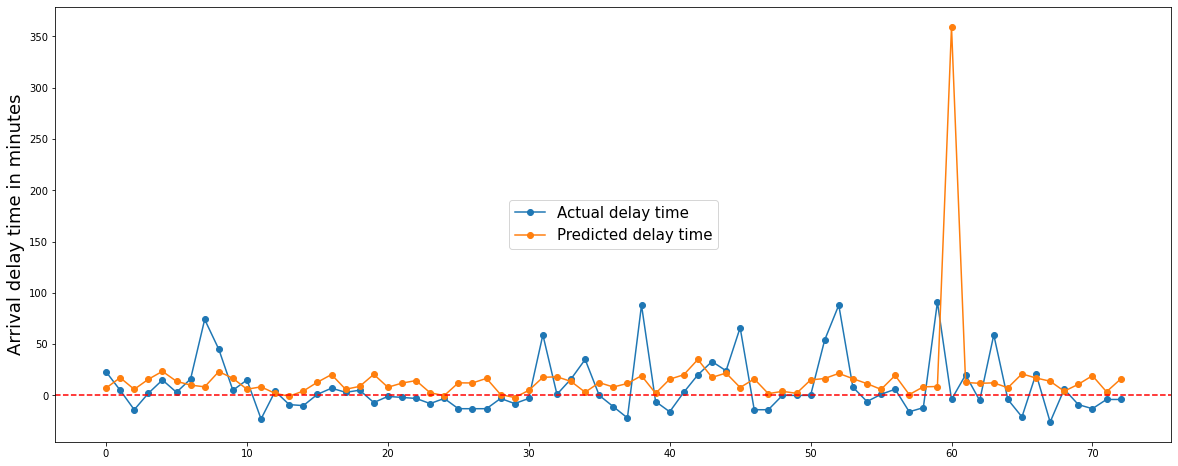

In [103]:
plt.figure(figsize=(20,8))
plt.plot(y_val.reset_index(drop=True), 'o-')
plt.plot(y_pred_gb,'o-')
plt.axhline(y = 0, color = 'r', linestyle = 'dashed')
plt.ylabel('Arrival delay time in minutes', fontsize=18)
plt.legend(['Actual delay time', 'Predicted delay time'],fontsize=15, loc='center')
plt.show()